In [197]:
# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# RDKit
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit import DataStructs

# Our module
from Python_Scoring_Export import Scoring, Export
from Python_MLModel import RF, Ridge_M, XGB, NN, CB, DT, SVR_M, KNN
from Python_RemoveO import remove_outliers

In [198]:
MF_bit = 2**10
MF_radius = 4
Name_model = "RF"
j=0

df = remove_outliers("../Data.xlsx", "New_Data", 2)
# Select feature for data: X=SMILE, Y=Tb
X_data_excel= df[["SMILES"]]
Y_data= df["Tb"] 

# Generate Fingerprint from SMILE
 
X_data_use = X_data_excel.copy()
X_data_use["molecule"] = X_data_use["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["count_morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.GetHashedMorganFingerprint(
    x, 
    radius=MF_radius, 
    nBits=MF_bit,
    useFeatures=True, useChirality=True))
X_data_use["arr_count_morgan_fp"] = 0
#X_data_use["arr_count_morgan_fp"] = np.zeros((0,), dtype=np.int8)
        
#X_data_use["arr_count_morgan_fp"] 
#new_df = X_data_use.apply(DataStructs.ConvertToNumpyArray, axis=0, args=('count_morgan_fp',))
         
# Transfrom Fingerprint to Column in DataFrame
X_data_fp = []
for i in range(X_data_use.shape[0]):
    #print(np.array(X_data_use["morgan_fp"][i]))
    blank_arr = np.zeros((0,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(X_data_use["count_morgan_fp"][i],blank_arr)
    datafram_i = pd.DataFrame(blank_arr)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)

x_data_fp = pd.concat(X_data_fp, ignore_index=True)
y_data_fp = Y_data.copy()

#k_best = SelectKBest(f_regression, k=500) # Select the top 200 features
#x_new = k_best.fit_transform(x_data_fp, y_data_fp)

x_train_fp, x_test_fp, y_train_fp, y_test_fp = train_test_split(x_data_fp, y_data_fp, test_size=0.1, random_state=42)

In [193]:
out_list = []
for column in x_train_fp.columns:
    corr_tuple = pearsonr(x_train_fp[column], y_train_fp)
    out_list.append([column, corr_tuple[0], corr_tuple[1]])

# Relationship of Features with Response Variables

In [132]:
def plot_join_plot(df, feature, target):
  j = sns.jointplot(data=df, x=feature, y=target, kind='reg')
  ax = j.ax_joint
  r, p = stats.pearsonr(df[feature], df[target])
  j.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$', xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
  return plt.show()

In [133]:
train_df = pd.concat([x_train_fp, y_train_fp], axis=1)

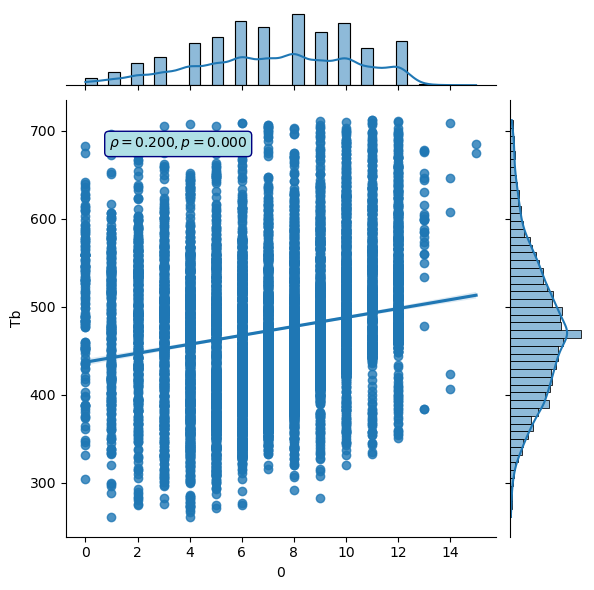

In [134]:
target_col = "Tb"
plot_join_plot(train_df, 0, target_col)

# Correlation Analysis using Pearson Analysis

In [199]:
corr_df = pd.DataFrame(out_list, columns=["Features", "Correlation", "P-Value"])
corr_df

,Features,Correlation,P-Value
0,0,0.200412,3.171290e-103
1,1,0.306093,6.917731e-245
2,2,0.268658,5.549418e-187
3,3,0.229675,7.961963e-136
4,4,0.104658,4.978130e-29
...,...,...,...
1019,1019,0.028437,2.440654e-03
1020,1020,0.033316,3.838638e-04
1021,1021,0.014373,1.256174e-01
1022,1022,0.022495,1.651906e-02


In [200]:
corr_df.sort_values(by=['P-Value'], inplace=True)
corr_df

,Features,Correlation,P-Value
1,1,0.306093,6.917731e-245
2,2,0.268658,5.549418e-187
24,24,0.268536,8.287838e-187
32,32,0.262314,4.891209e-178
926,926,0.236187,9.537133e-144
...,...,...,...
275,275,-0.000398,9.661427e-01
374,374,-0.000370,9.685251e-01
733,733,-0.000127,9.891963e-01
840,840,-0.000097,9.917909e-01


In [201]:
new_data = corr_df[corr_df["P-Value"] < 0.05]
new_data

,Features,Correlation,P-Value
1,1,0.306093,6.917731e-245
2,2,0.268658,5.549418e-187
24,24,0.268536,8.287838e-187
32,32,0.262314,4.891209e-178
926,926,0.236187,9.537133e-144
...,...,...,...
309,309,0.018566,4.788289e-02
505,505,-0.018449,4.930053e-02
554,554,0.018446,4.934040e-02
579,579,-0.018406,4.983679e-02


In [138]:
max(x_train_fp[1][:])

4

In [23]:
x_train_fp.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
210,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12371,12,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11165,2,0,0,0,9,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
651,6,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10661,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Score and P-Value

In [83]:
k_best = SelectKBest(f_regression, k=668) # Select the top 200 features
x_new = k_best.fit_transform(x_data_fp, y_data_fp)

scores = k_best.scores_
pvalues = k_best.pvalues_

selected_features = k_best.get_support()
feature_names = x_data_fp.columns
        
#Print the scores of the selected features
test = []
for i, feature_name in enumerate(feature_names):
    if selected_features[i]:
        test.append([feature_name, scores[i], pvalues[i]])
#        print(f"Feature {feature_name}: {scores[i]:.2f}")

In [135]:
n_df = pd.DataFrame(test, columns=["Features", "Score", "P-Value"])
n_df.sort_values(by=['Score'], ascending=False, inplace=False)

,Features,Score,P-Value
1,1,1270.415336,3.355373e-265
2,2,955.809662,2.302069e-202
14,32,937.094211,1.401223e-198
372,2397,935.238161,3.327377e-198
509,3096,931.059825,2.332553e-197
...,...,...,...
50,261,5.753579,1.646953e-02
298,1878,5.716610,1.681972e-02
135,782,5.685373,1.712159e-02
454,2795,5.672878,1.724390e-02


In [125]:
nn = n_df[(n_df["Score"] > 10) & (n_df["P-Value"] < 0.05)].sort_values(by=['Score'], ascending=False)
nn.shape

(395, 3)